In [3]:
import os
print(os.listdir(r'C:\flowers\flowers'))


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [3]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
     ------------------------------------ 276.5/276.5 MB 537.4 kB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 456.8 kB/s eta 0:00:00
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
     ---------------------------------------- 4.2/4.2 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 101.0 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 24.4/24.4 MB 389.4 kB/s eta 0:00:00
     ------------------------------------ 440.8/440.8 kB 316.8 kB/s eta 0:00:00
     ------------------------------------ 182.1/182.1 kB 784.6 kB/s eta 0:00:00
  

In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [3]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = r'C:\flowers\flowers\daisy'
FLOWER_SUNFLOWER_DIR = r'C:\flowers\flowers\sunflower'
FLOWER_TULIP_DIR = r'C:\flowers\flowers\tulip'
FLOWER_DANDELION_DIR = r'C:\flowers\flowers\dandelion'
FLOWER_ROSE_DIR = r'C:\flowers\flowers\rose'


In [4]:
def assign_label(img,flower_type):
    return flower_type

In [6]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [7]:
make_train_data('Daisy',FLOWER_DAISY_DIR) # Daisy görüntüleri X dizinine, etiketleri Z dizinine ekler
print(len(X)) #X listesindeki görüntülerin sayısını ekrana yazdırır

100%|███████████████████████████████████████████████████████████████████████████████| 764/764 [00:06<00:00, 125.48it/s]

764


In [8]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 733/733 [00:05<00:00, 132.91it/s]

1497


In [9]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:07<00:00, 124.85it/s]

2481


In [10]:
make_train_data('Dandelion',FLOWER_DANDELION_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:07<00:00, 144.50it/s]

3533


In [11]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:05<00:00, 144.20it/s]

4317


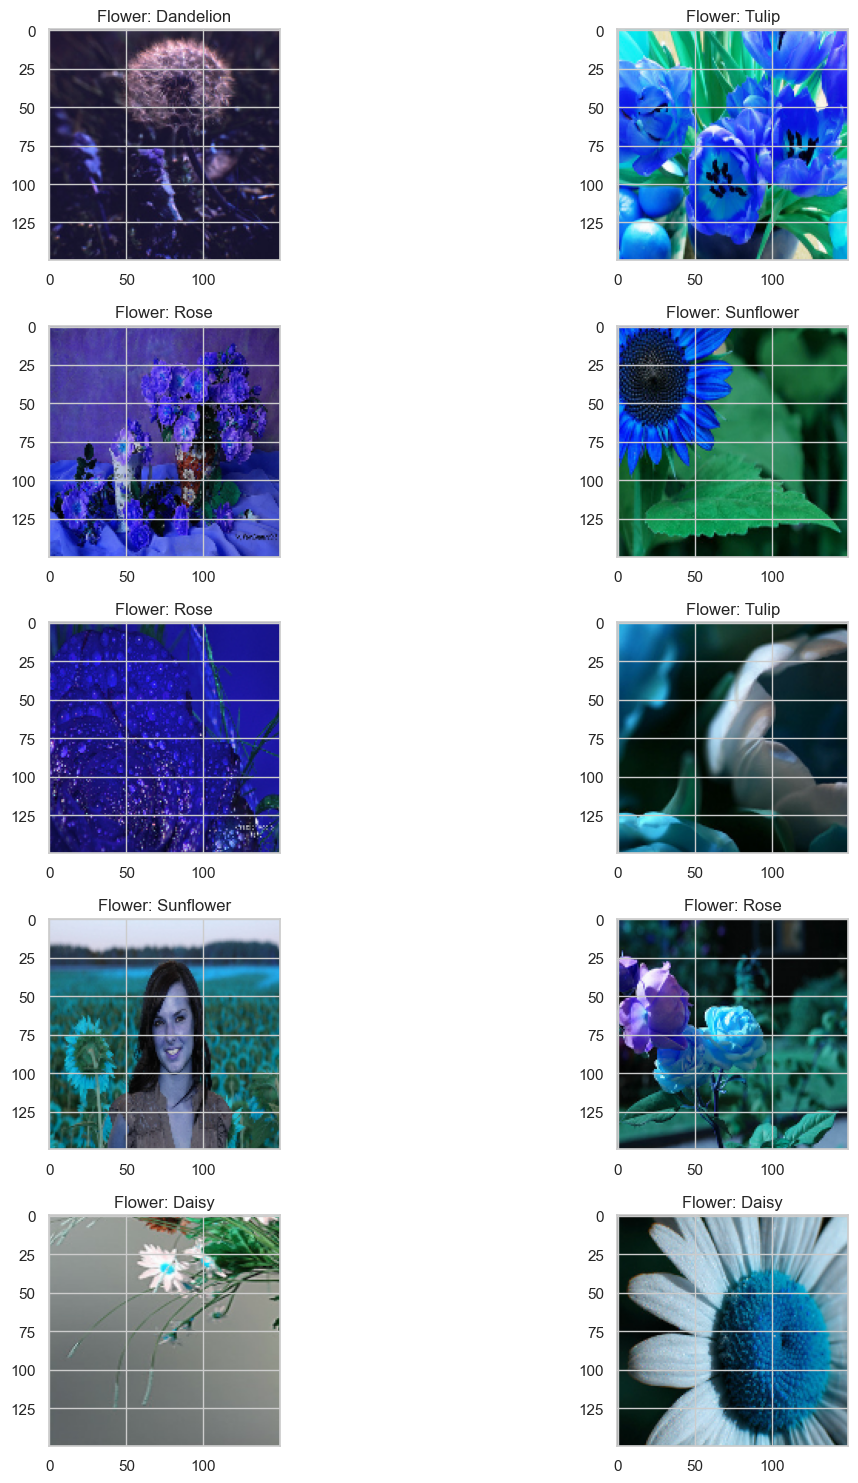

In [12]:
fig,ax=plt.subplots(5,2) #5 satır ve 2 sütundan oluşan bir alt grafik oluşturur
fig.set_size_inches(15,15) #alt grafiklerin boyutunu 15x15 inç olarak belirler
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z)) #Z listesinin uzunluğu aralığında bir rastgele indeks seçer ve bu indekse karşılık gelen bir görüntü seçer
        ax[i,j].imshow(X[l]) #seçilen görüntüyü (X[l]) i. satır ve j. sütuna yerleştirir
        ax[i,j].set_title('Flower: '+Z[l]) #grafik için bir başlık belirler
        
plt.tight_layout()

In [13]:
#Modelin daha iyi sonuç elde edebilmesi için kullanılır
le=LabelEncoder() # etiketleri sayısal değerlere dönüştürür. Papatya=1 Gül=0 gibi
Y=le.fit_transform(Z) 
Y=to_categorical(Y,5) #sayısal etiketleri one-hot encoded vektörlere dönüştürür
X=np.array(X)
X=X/255

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
import numpy as np
import random as rn
import tensorflow as tf

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


In [22]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [23]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [26]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 18, 18, 96)       

In [28]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
25/25 [==============================] - 48s 2s/step - loss: 1.4292 - accuracy: 0.3509 - val_loss: 1.2029 - val_accuracy: 0.4759
Epoch 2/50
25/25 [==============================] - 47s 2s/step - loss: 1.1774 - accuracy: 0.5095 - val_loss: 1.0445 - val_accuracy: 0.5444
Epoch 3/50
25/25 [==============================] - 51s 2s/step - loss: 1.0997 - accuracy: 0.5574 - val_loss: 1.0441 - val_accuracy: 0.5907
Epoch 4/50
25/25 [==============================] - 48s 2s/step - loss: 1.0334 - accuracy: 0.5796 - val_loss: 0.9409 - val_accuracy: 0.6194
Epoch 5/50
25/25 [==============================] - 48s 2s/step - loss: 0.9732 - accuracy: 0.6234 - val_loss: 0.9641 - val_accuracy: 0.6315
Epoch 6/50
25/25 [==============================] - 49s 2s/step - loss: 0.9287 - accuracy: 0.6439 - val_loss: 0.8447 - val_accuracy: 0.6611
Epoch 7/50
25/25 [==============================] - 49s 2s/step - loss: 0.8999 - accuracy: 0.6478 - val_loss: 0.8242 - val_accuracy: 0.6611
Epoch 8/50
25/25 [==

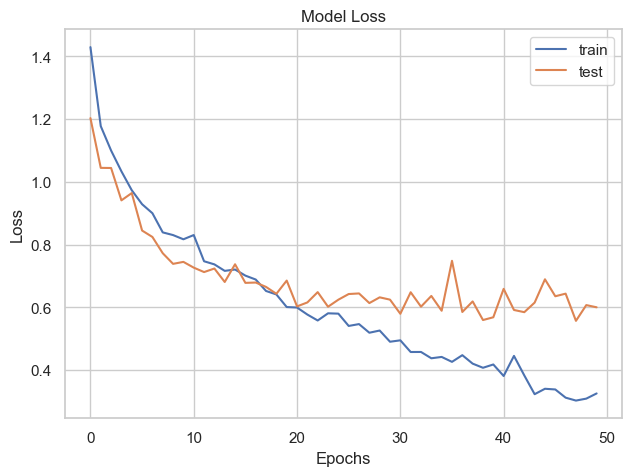

In [29]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

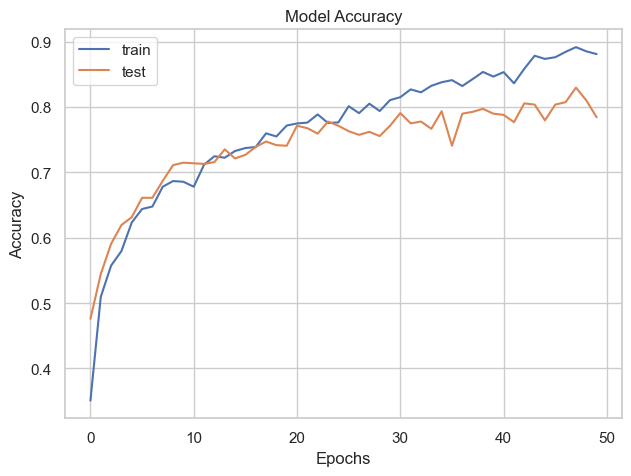

In [31]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [32]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 4s 115ms/step


In [38]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

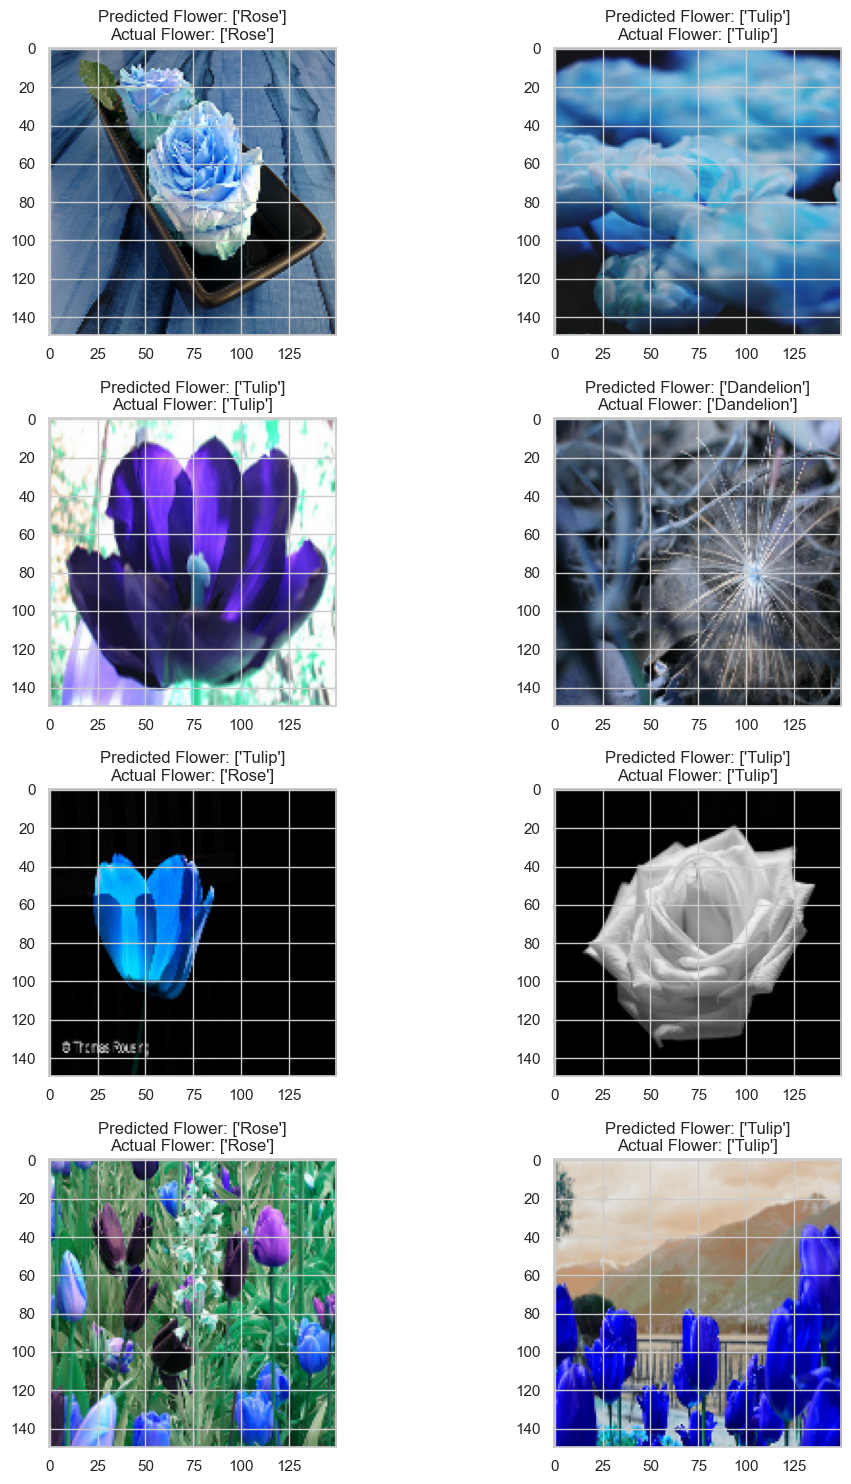

In [48]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)

y_test = np.squeeze(y_test)
pred_digits = np.squeeze(pred_digits)

classes = le.classes_

for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[prop_class[count]])
        if y_test.size > 0:
            ax[i, j].set_title("Predicted Flower: " + str(le.inverse_transform([pred_digits[count]])) + "\n" + "Actual Flower: " + str(le.inverse_transform([np.argmax(y_test[count])])))
        else:
            ax[i, j].set_title("Predicted Flower: " + str(le.inverse_transform(pred_digits[count])))
            ax[i, j].set_xlabel(str(classes[pred_digits[count]]))
        plt.tight_layout()
        count += 1